In [130]:
# import libraries 
import matplotlib.pyplot as plt # to visualize the data
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import seaborn as sns

# import dataset
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()


In [131]:
#now checking the sizes of both training and testing datasets
x_train.shape


(60000, 28, 28)

In [132]:
x_test.shape

(10000, 28, 28)

In [133]:
y_train.shape

(60000,)

In [134]:
y_test.shape

(10000,)

In [135]:
y_test #to see what is there in y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [136]:
class_labels=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Sneaker","Bag","Anleboot"]
class_labels

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Sneaker',
 'Bag',
 'Anleboot']

5


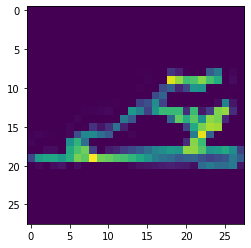

In [137]:
#Performing  datavisualization

i=300     #index, it is any value btw 0 to 60000
plt.imshow(x_train[i])
print(y_train[i])                        #(in out below 5 is label related to sandal)

0


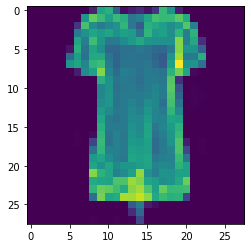

In [138]:
# we can also check with another index

i=950     #index, it is any value btw 0 to 60000
plt.imshow(x_train[i])
print(y_train[i])

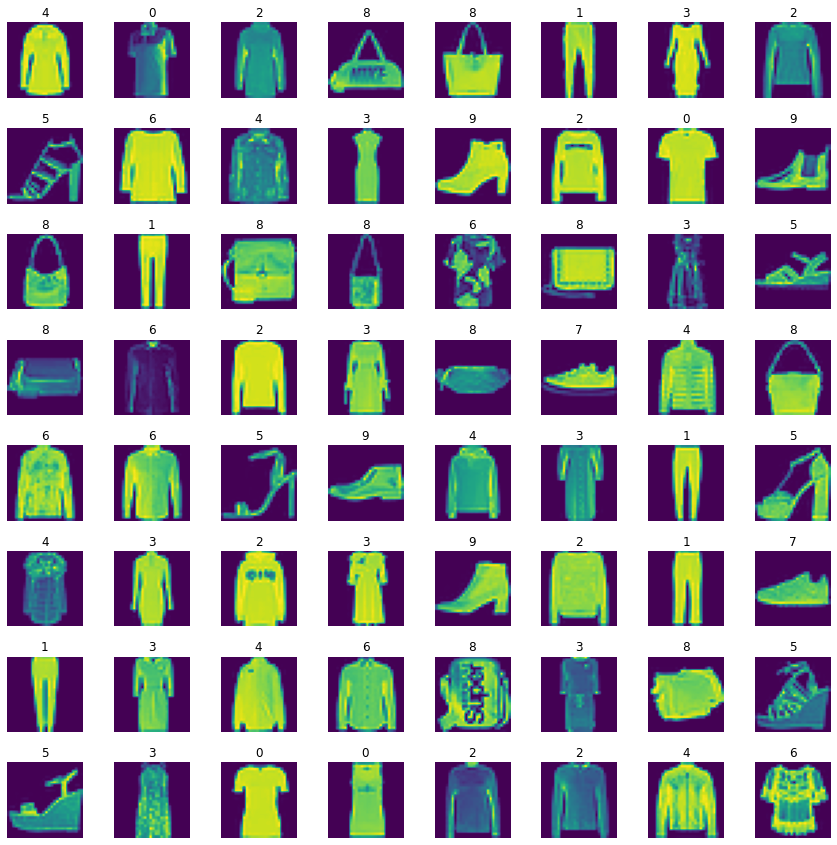

In [139]:
# instead of doing with index/changing value over and over again, we can cretae a matrix containg random images along with 
#their labels
# now we define width and length of a matrix
W_matr=8
L_matr=8
fig, axes=plt.subplots(W_matr,L_matr, figsize=(15,15))

# now flatten up axes using

axes=axes.ravel()
x_training = len(x_train) # obtaining length of trainig data

for i in np.arange(0,W_matr*L_matr):
    index=np.random.randint(0, x_training) # pick a random number
    axes[i].imshow(x_train[index]) # to show image which taken randomly
    axes[i].set_title(y_train[index]) # to show label corresponding to that image
    axes[i].axis('off')  # to disable the axis label off so that we can decrease the space btw images
    plt.subplots_adjust(hspace=0.4) # adjusting the space btw images and distance btw them is 0.4

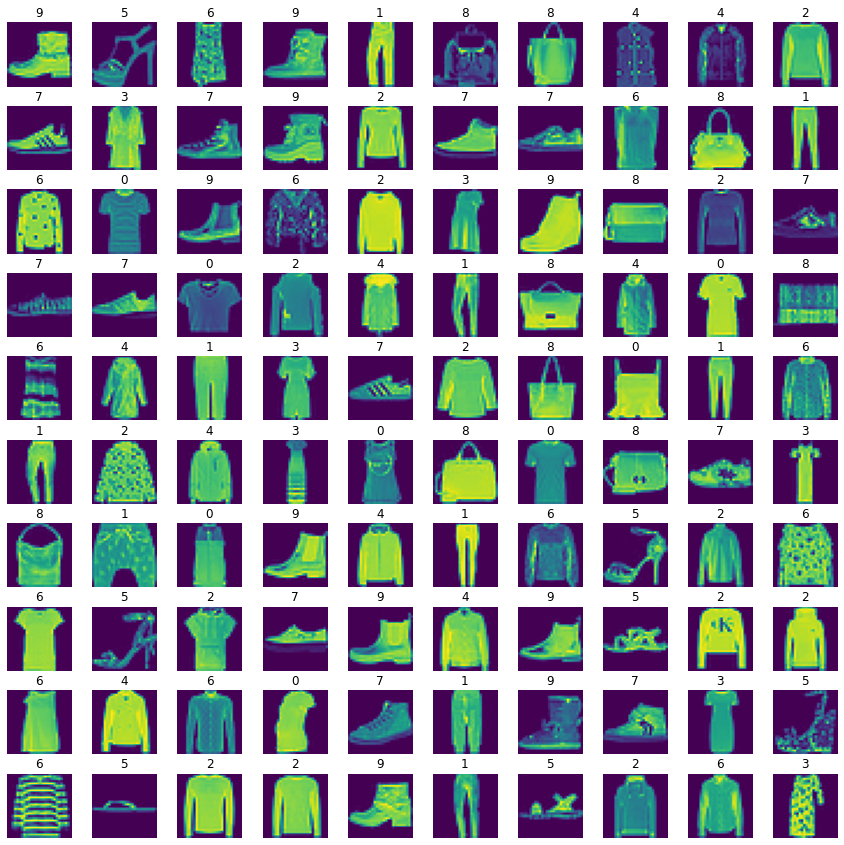

In [140]:
W_matr=10
L_matr=10
fig, axes=plt.subplots(W_matr,L_matr, figsize=(15,15))

# now flatten up axes using

axes=axes.ravel()
x_training = len(x_train) # obtaining length of trainig data

for i in np.arange(0,W_matr*L_matr):
    index=np.random.randint(0, x_training) # pick a random number
    axes[i].imshow(x_train[index]) # to show image which taken randomly
    axes[i].set_title(y_train[index]) # to show label corresponding to that image
    axes[i].axis('off')  # to disable the axis label off so that we can decrease the space btw images
    plt.subplots_adjust(hspace=0.3) # adjusting the space btw images and distance btw them is 0.3

In [141]:
# Preparing the data for training 
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [142]:
number_cat=10 #no.of categories(classes)
y_train=tf.keras.utils.to_categorical(y_train, number_cat) # number_cat means we are specifying no.of columns to be generate

In [143]:
x_train.shape


(60000, 28, 28)

In [144]:
y_train.shape

(60000, 10)

In [145]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [146]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [147]:
# now we can do same for testing data

y_test=tf.keras.utils.to_categorical(y_test, number_cat) #y-test is target labels for my testing data
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [148]:
x_train.shape

(60000, 28, 28)

In [149]:
y_train.shape

(60000, 10)

In [150]:
x_train=np.expand_dims(x_train, -1)
x_train.shape

(60000, 28, 28, 1)

In [151]:
# Building a deep learning Model
mymodel=models.Sequential()
mymodel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1))), # relu= rectify linear units =used to introduce non linearity in our network
mymodel.add(layers.MaxPooling2D(2,2)),
mymodel.add(layers.Conv2D(64,(3,3),activation='relu')),
mymodel.add(layers.MaxPooling2D(2,2)) # here we don't  need to specify shape it takes from previous layer
mymodel.add(layers.Conv2D(64,(3,3),activation='relu')),
mymodel.add(layers.Flatten()), # to flatten the pixels
mymodel.add(layers.Dense(64,activation='relu')), # 64 is no of nuerons # Dense layer
mymodel.add(layers.Dense(10,activation='sigmoid')) # 10 nuerons corresponding to our 10 classes # output layer 
mymodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [152]:
# compiling and training a Our model
mymodel.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001,decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy']),
x_train.shape


(60000, 28, 28, 1)

In [153]:
epochs=10
history=mymodel.fit(x_train, y_train, batch_size=512, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 31s 261ms/step - loss: 1.4737 - accuracy: 0.4877
Epoch 2/10
118/118 [==============================] - 28s 238ms/step - loss: 0.7361 - accuracy: 0.7484
Epoch 3/10
118/118 [==============================] - 31s 260ms/step - loss: 0.6039 - accuracy: 0.7908
Epoch 4/10
118/118 [==============================] - 28s 240ms/step - loss: 0.5276 - accuracy: 0.8174
Epoch 5/10
118/118 [==============================] - 27s 230ms/step - loss: 0.4803 - accuracy: 0.8336
Epoch 6/10
118/118 [==============================] - 27s 229ms/step - loss: 0.4393 - accuracy: 0.8454
Epoch 7/10
118/118 [==============================] - 27s 229ms/step - loss: 0.4119 - accuracy: 0.8554
Epoch 8/10
118/118 [==============================] - 27s 230ms/step - loss: 0.3890 - accuracy: 0.8622
Epoch 9/10
118/118 [==============================] - 27s 233ms/step - loss: 0.3681 - accuracy: 0.8698
Epoch 10/10
118/118 [==============================] - 27s 230ms/step - l

In [154]:
# Assessing or testing our trained model performance
x_test.shape

(10000, 28, 28)

In [155]:
x_test=np.expand_dims(x_test,axis=-1)
x_test.shape

(10000, 28, 28, 1)

In [156]:
 y_test.shape

(10000, 10)

In [157]:
y_pred=mymodel.predict(x_test)

In [158]:
mymodel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4806 - accuracy: 0.8418


[0.4805818498134613, 0.8417999744415283]

In [161]:
x_test=x_test.astype('float') # we converting x_test dataset in float
predicted_classes=mymodel.predict(x_test)
predicted_classes

array([[6.0292899e-05, 4.9585633e-06, 9.1785881e-07, ..., 9.0950727e-04,
        6.8978443e-05, 4.7110662e-01],
       [4.1195750e-04, 1.0729562e-07, 4.2895326e-01, ..., 2.9354707e-08,
        1.5048219e-05, 2.0576863e-08],
       [1.5510707e-08, 9.6183825e-01, 1.1473033e-09, ..., 4.3315061e-12,
        1.6763230e-09, 1.8326915e-05],
       ...,
       [2.2336841e-04, 3.1676322e-08, 2.3952127e-04, ..., 3.8476037e-07,
        7.2923607e-01, 2.0242165e-08],
       [3.0143228e-06, 9.5266843e-01, 2.0274546e-08, ..., 5.8768733e-11,
        1.1831386e-06, 1.8119812e-04],
       [8.4152818e-04, 6.8513611e-05, 5.3766849e-05, ..., 3.9545506e-02,
        3.6923587e-03, 2.7926266e-03]], dtype=float32)